In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
import config
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import json

In [82]:
#Importing All DataFrame
occupation_df = pd.read_csv('../Data/rawdata/occupation_df.csv')
original_df = pd.read_csv('../Data/rawdata/original_df.csv')
population_df = pd.read_csv('../Data/rawdata/population_df.csv')
log_data = pd.read_csv('../Data/cleandata/Transformed_Data.csv')
years = pd.to_datetime(occupation_df['years'])
del occupation_df['years']

# Houston Employment by Industry

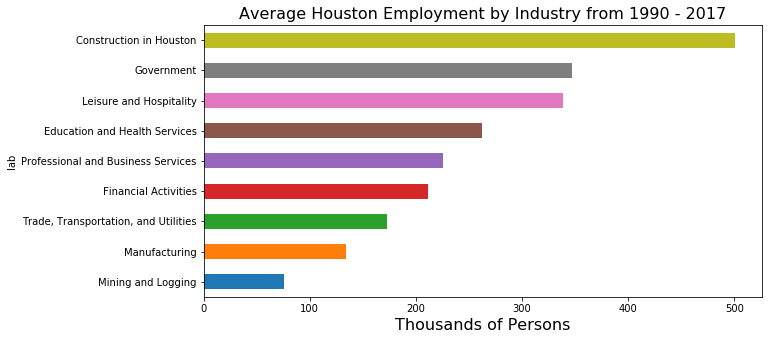

In [31]:
#HPI vs Oil Price 
industry_name = occupation_df.columns.values
avg_occupation = []
for name in industry_name:
    avg_occupation.append(occupation_df[name].mean())
avg_occupation.sort()

occupation_df = pd.DataFrame({'lab':industry_name, 'val':avg_occupation})
occupation_df.plot.barh(x='lab', y='val', figsize =(10,5), legend = None)
plt.title("Average Houston Employment by Industry from 1990 - 2017", size = 16)
plt.xlabel("Thousands of Persons", size = 16)
plt.savefig("../Output_Fig/Analysis_output/Houston_Employment.png")

# HPI vs WTI Oil Price

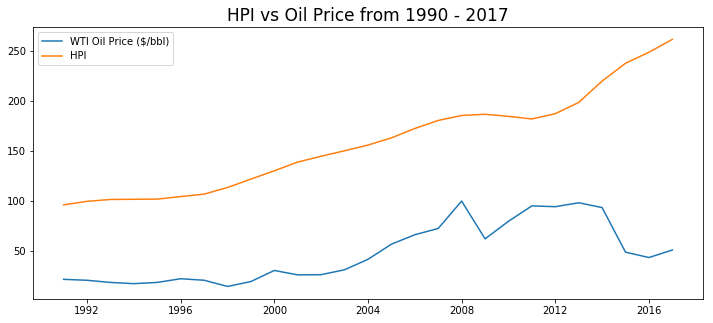

In [34]:
plt.subplots(figsize = (12,5))
labels = ['WTI Oil Price ($/bbl)','HPI']
plt.plot(years, original_df['WTI Oil Price'])
plt.plot(years,original_df['Houston House Price Index'])
plt.title("HPI vs Oil Price from 1990 - 2017",size = 17)
plt.legend(labels)
plt.savefig("../Output_Fig/Analysis_output/HPI_vs_OilPrice.png")

# Oil and Gas Workers Trend

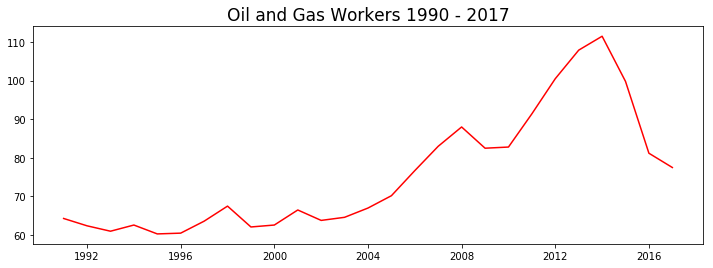

In [41]:
plt.subplots(figsize = (12,4))
plt.plot(years,occupation_df['Mining and Logging'], color = 'red' )
plt.title("Oil and Gas Workers 1990 - 2017",size = 17)
plt.savefig("../Output_Fig/Analysis_output/Oil_Worker_Trend.png")

# Population Plot

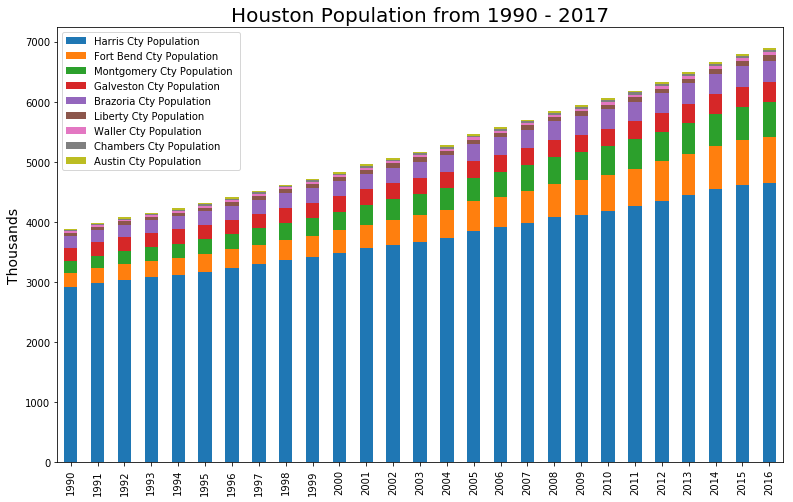

In [81]:
dates = pd.Series(range(1990,2018))
population_df.plot.bar(stacked = True, figsize = (13,8))
plt.xticks(np.arange(len(years)),dates[0:28])
plt.legend(loc = 'upper left')
plt.title("Houston Population from 1990 - 2017", size = 20)
plt.ylabel('Thousands', size = 14)
plt.savefig("../Output_Fig/Analysis_output/Houston_Population.png")
plt.show()

# Perform Regression

In [84]:
#Creadte DataFrame for regression task
reg_data = pd.DataFrame({
    "HPI": log_data['Houston House Price Index'],
    "HCPI": log_data['Houston Consumer Price Index'], 
    "Construction_Cost": log_data['Construction Materials Index'],
    "Oil_Price":log_data['WTI Oil Price'], 
    "Unemployment":log_data['Unemployment Rate'],
    "Interest":log_data['Interest Rate'],
    "Population":log_data['Houston Population'],
    "Economic_Conditions":log_data['Economic Conditions'],
    "Total_Permit":log_data['Total Permit']})
reg_data = reg_data.reset_index(drop=True)

# Oil Price vs HPI Regression

In [85]:
oil_var_result = sm.ols(formula= "HPI ~ Oil_Price", data=reg_data).fit()
print (oil_var_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4907
Date:                Wed, 23 Jan 2019   Prob (F-statistic):              0.494
Time:                        00:19:20   Log-Likelihood:                 38.444
No. Observations:                  18   AIC:                            -72.89
Df Residuals:                      16   BIC:                            -71.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0418      0.007      5.697      0.0

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


# All variables vs HPI Regression

In [86]:
all_var_reg_result = sm.ols(formula= "HPI ~ HCPI + Construction_Cost + Oil_Price + Unemployment + Interest + Population + Economic_Conditions + Total_Permit", 
                data=reg_data).fit()

print (all_var_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1.811
Date:                Wed, 23 Jan 2019   Prob (F-statistic):              0.197
Time:                        00:22:37   Log-Likelihood:                 46.806
No. Observations:                  18   AIC:                            -75.61
Df Residuals:                       9   BIC:                            -67.60
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0806    

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


# Final Regression

In [87]:
final_fit = sm.ols(formula="HPI ~  Construction_Cost + Population ", 
                data=reg_data).fit()

print (final_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    HPI   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     7.523
Date:                Wed, 23 Jan 2019   Prob (F-statistic):            0.00546
Time:                        00:49:23   Log-Likelihood:                 44.424
No. Observations:                  18   AIC:                            -82.85
Df Residuals:                      15   BIC:                            -80.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0561      0.03

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
